## Initialization

In [1]:
import pandas as pd

In [2]:
years = list(range(1999, 2024))

In [3]:
csv_files = [f"./Data/play_by_play_{year}.csv" for year in years]

In [4]:
# load each csv file as a dataframe and collect them in a list
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

C:\Users\thilo\AppData\Local\Temp\ipykernel_7908\2200896479.py:4: DtypeWarning: Columns (36,37,179,180,189,190,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\thilo\AppData\Local\Temp\ipykernel_7908\2200896479.py:4: DtypeWarning: Columns (37,45,179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,248,249,253,254,255,260,262,263,283,284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\thilo\AppData\Local\Temp\ipykernel_7908\2200896479.py:4: DtypeWarning: Columns (37,179,180,182,183,189,190,193,194,197,198,203,204,205,206,209,210,213,214,218,219,220,248,249,253,254,255,260,262,263,266,267,268,269,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
C:\Users\thilo\AppData\Loc

KeyboardInterrupt: 

## Removal of Useless Observations

In [ ]:
list(dataframes[0]["play_type"].unique())

['kickoff',
 'pass',
 'run',
 'no_play',
 'punt',
 'extra_point',
 nan,
 'field_goal',
 'qb_kneel',
 'qb_spike']

In [ ]:
# remove useless plays from dataframes to reduce size for combining dataframes
for dataframe in dataframes:
    dataframe.drop(
        dataframe[~dataframe["play_type"].isin(["pass", "run"])].index,
        axis=0,
        inplace=True,
    )

In [ ]:
# combine all dataframes into a single one
combined_df = pd.concat(dataframes, axis=0)

# reset the index of the combined dataframe
combined_df.reset_index(drop=True, inplace=True)

In [ ]:
# drop safeties
combined_df.drop(combined_df[combined_df["safety"] == 1].index, axis=0, inplace=True)

In [ ]:
# drop plays with penalties
combined_df.drop(combined_df[combined_df["penalty"] == 1].index, axis=0, inplace=True)

In [ ]:
# drop plays with laterals
combined_df.drop(
    combined_df[combined_df["lateral_reception"] == 1].index, axis=0, inplace=True
)

In [ ]:
# drop plays with laterals
combined_df.drop(
    combined_df[combined_df["lateral_rush"] == 1].index, axis=0, inplace=True
)

In [ ]:
# drop plays with replays or challenges
combined_df.drop(
    combined_df[combined_df["replay_or_challenge"] == 1].index, axis=0, inplace=True
)

In [ ]:
# drop two point conversion plays
combined_df.drop(
    combined_df[~combined_df["two_point_conv_result"].isna()].index, axis=0, inplace=True
)

## Handling of Missing Values

In [ ]:
display(combined_df[(combined_df['roof'].isna())].groupby('game_id').count())

,play_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
game_id,,,,,,,,,,,,,,,,,,,,,
2021_01_JAX_HOU,137,137,137,137,137,137,137,137,137,137,...,137,137,137,75,75,75,75,75,137,137
2021_01_PHI_ATL,125,125,125,125,125,125,125,125,125,125,...,125,125,125,61,61,61,61,61,125,125
2021_01_SEA_IND,123,123,123,123,123,123,123,123,123,123,...,123,123,123,51,51,51,51,51,123,123
2021_02_LA_IND,123,123,123,123,123,123,123,123,123,123,...,123,123,123,57,57,57,57,57,123,123
2021_03_CAR_HOU,114,114,114,114,114,114,114,114,114,114,...,114,114,114,56,56,56,56,56,114,114
2021_04_WAS_ATL,127,127,127,127,127,127,127,127,127,127,...,127,127,127,63,63,63,63,63,127,127
2021_05_NE_HOU,110,110,110,110,110,110,110,110,110,110,...,110,110,110,51,51,51,51,51,110,110
2021_06_HOU_IND,119,119,119,119,119,119,119,119,119,119,...,119,119,119,57,57,57,57,57,119,119
2021_08_CAR_ATL,118,118,118,118,118,118,118,118,118,118,...,118,118,118,47,47,47,47,47,118,118


In [ ]:
"""
https://www.nfl.com/games/jaguars-at-texans-2021-reg-1 (closed)
https://www.nfl.com/games/eagles-at-falcons-2021-reg-1 (open)
https://www.nfl.com/games/seahawks-at-colts-2021-reg-1 (closed)
https://www.nfl.com/games/rams-at-colts-2021-reg-2 (closed)
https://www.nfl.com/games/panthers-at-texans-2021-reg-3 (closed)
https://www.nfl.com/games/football-team-at-falcons-2021-reg-4 (open)
https://www.nfl.com/games/patriots-at-texans-2021-reg-5  (closed)
https://www.nfl.com/games/texans-at-colts-2021-reg-6 (open)
https://www.nfl.com/games/panthers-at-falcons-2021-reg-8 (open)
https://www.nfl.com/games/rams-at-texans-2021-reg-8 (closed)
https://www.nfl.com/games/titans-at-colts-2021-reg-8 (open)
https://www.nfl.com/games/jets-at-colts-2021-reg-9 (closed)
https://www.nfl.com/games/jaguars-at-colts-2021-reg-10 (closed)
https://www.nfl.com/games/patriots-at-falcons-2021-reg-11 (closed)
https://www.nfl.com/games/jets-at-texans-2021-reg-12 (closed)
https://www.nfl.com/games/buccaneers-at-colts-2021-reg-12 (closed)
https://www.nfl.com/games/colts-at-texans-2021-reg-13 (closed)
https://www.nfl.com/games/buccaneers-at-falcons-2021-reg-13 (closed)
https://www.nfl.com/games/seahawks-at-texans-2021-reg-14 (open)
https://www.nfl.com/games/patriots-at-colts-2021-reg-15 (closed)
https://www.nfl.com/games/lions-at-falcons-2021-reg-16 (open)
https://www.nfl.com/games/chargers-at-texans-2021-reg-16 (closed)
https://www.nfl.com/games/raiders-at-colts-2021-reg-17 (closed)
https://www.nfl.com/games/saints-at-falcons-2021-reg-18 (closed)
https://www.nfl.com/games/titans-at-texans-2021-reg-18 (closed)
"""


closed_roof = [
    "2021_01_JAX_HOU",
    "2021_01_SEA_IND",
    "2021_02_LA_IND",
    "2021_03_CAR_HOU",
    "2021_05_NE_HOU",
    "2021_08_LA_HOU",
    "2021_09_NYJ_IND",
    "2021_10_JAX_IND",
    "2021_11_NE_ATL",
    "2021_12_NYJ_HOU",
    "2021_12_TB_IND",
    "2021_13_IND_HOU",
    "2021_13_TB_ATL",
    "2021_15_NE_IND",
    "2021_16_LAC_HOU",
    "2021_17_LV_IND",
    "2021_18_NO_ATL",
    "2021_18_TEN_HOU"
]

open_roof = [
    "2021_01_PHI_ATL",
    "2021_04_WAS_ATL",
    "2021_06_HOU_IND",
    "2021_08_CAR_ATL",
    "2021_08_TEN_IND",
    "2021_14_SEA_HOU",
    "2021_16_DET_ATL"
]

def update_roof(row):
    if any(game_id in row['game_id'] for game_id in open_roof):
        return "open"
    if any(game_id in row['game_id'] for game_id in closed_roof):
        return "closed"
    return row['roof']

# Apply the function to update 'roof'
combined_df.loc[combined_df['roof'].isna(), 'roof'] = combined_df[combined_df['roof'].isna()].apply(update_roof, axis=1)



In [ ]:
display(combined_df[(combined_df['roof'].isna())].groupby('game_id').count())

,play_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
game_id,,,,,,,,,,,,,,,,,,,,,


## Dropping of Useless Features

In [ ]:
drop_columns1 = [
    "play_id",
    "game_id",
    "old_game_id",
    "home_team",
    "away_team",
    "season_type",
    "week",
    "defteam",
    "side_of_field",
    # "game_date",
    "quarter_seconds_remaining",
    "quarter_end",
    "drive",
    "sp",  # eventuell relevant laut TOK
    "qtr",
    "time",
    "yrdln",
    "ydsnet",
    "qb_kneel",
    "qb_spike",
    "pass_length",
    "pass_location",
    "run_location",
    "run_gap",
    "field_goal_result",
    "kick_distance",
    "extra_point_result",
    "two_point_conv_result",
    "home_timeouts_remaining",
    "away_timeouts_remaining",
    "timeout",
    "timeout_team",
    "td_team",
    "td_player_name",
    "td_player_id",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining",
    "total_home_score",
    "total_away_score",
    "posteam_score",
    "defteam_score",
    "posteam_score_post",
    "defteam_score_post",
    "score_differential_post",
    "no_score_prob",
    "opp_fg_prob",
    "opp_safety_prob",
    "opp_td_prob",
    "fg_prob",
    "safety_prob",
    "extra_point_prob",
    "two_point_conversion_prob",
    "total_home_epa",
    "total_away_epa",
    "total_home_rush_epa",
    "total_away_rush_epa",
    "total_home_pass_epa",
    "total_away_pass_epa",
    "air_epa",
    "yac_epa",
    "comp_air_epa",
    "comp_yac_epa",
    "total_home_comp_air_epa",
    "total_away_comp_air_epa",
    "total_home_comp_yac_epa",
    "total_away_comp_yac_epa",
    "total_home_raw_air_epa",
    "total_away_raw_air_epa",
    "total_home_raw_yac_epa",
    "total_away_raw_yac_epa",
    "def_wp",
    "home_wp",
    "away_wp",
    "vegas_wpa",
    "vegas_home_wpa",
    "home_wp_post",
    "away_wp_post",
    "vegas_wp",
    "vegas_home_wp",
    "total_home_rush_wpa",
    "total_away_rush_wpa",
    "total_home_pass_wpa",
    "total_away_pass_wpa",
    "air_wpa",
    "yac_wpa",
    "comp_air_wpa",
    "comp_yac_wpa",
    "total_home_comp_air_wpa",
    "total_away_comp_air_wpa",
    "total_home_comp_yac_wpa",
    "total_away_comp_yac_wpa",
    "total_home_raw_air_wpa",
    "total_away_raw_air_wpa",
    "total_home_raw_yac_wpa",
    "total_away_raw_yac_wpa",
    "punt_blocked",
    "touchback",
]

In [ ]:
drop_columns2 = [
    "punt_attempt",
    "safety_player_name",
    "punt_inside_twenty",
    "kicker_player_name",
    "passing_yards",
    "interception_player_name",
    "lateral_kickoff_returner_player_id",
    "assist_tackle",
    "qb_hit_2_player_id",
    "penalty_team",
    "lateral_receiver_player_name",
    "lateral_recovery",
    "wind",
    "rush_touchdown",
    "defensive_two_point_conv",
    "receiver_jersey_number",
    "tackle_with_assist",
    "fumbled_1_player_name",
    "tackle_with_assist_2_player_id",
    "two_point_attempt",
    "drive_quarter_start",
    "lateral_receiving_yards",
    "end_yard_line",
    "defensive_extra_point_attempt",
    "pass_touchdown",
    "lateral_rusher_player_name",
    "rusher_id",
    "aborted_play",
    "drive_yards_penalized",
    "fumble_not_forced",
    "penalty_player_id",
    "tackle_for_loss_2_player_id",
    "drive_end_yard_line",
    "passer_id",
    "stadium_id",
    "sack_player_name",
    "punt_out_of_bounds",
    "tackle_with_assist_2_team",
    "surface",
    "kickoff_downed",
    "extra_point_attempt",
    "punt_fair_catch",
    "assist_tackle_2_player_name",
    "fumble_forced",
    "special_teams_play",
    "drive_ended_with_score",
    "half_sack_1_player_name",
    "stadium",
    "lateral_receiver_player_id",
    "lateral_sack_player_name",
    "play",
    "tackle_with_assist_1_player_id",
    "forced_fumble_player_2_team",
    "home_coach",
    "xyac_epa",
    "lateral_punt_returner_player_name",
    "fantasy",
    "solo_tackle_1_team",
    "drive_start_transition",
    "first_down",
    "game_stadium",
    "xyac_fd",
    "drive_play_count",
    "passer",
    "fumbled_1_player_id",
    "replay_or_challenge_result",
    "drive_real_start_time",
    "receiver_player_id",
    "solo_tackle_2_player_id",
    "fumbled_2_player_name",
    "qb_hit_1_player_name",
    "kickoff_attempt",
    "xyac_success",
    "season",
    "rush",
    "tackle_with_assist_2_player_name",
    "assist_tackle_2_team",
    "sack_player_id",
    "assist_tackle_1_team",
    "play_deleted",
    "rusher_jersey_number",
    "pass_oe",
    "return_team",
    "tackle_for_loss_2_player_name",
    "time_of_day",
    "end_clock_time",
    "tackle_with_assist_1_team",
    "home_score",
    "tackle_with_assist_1_player_name",
    "kickoff_inside_twenty",
    "own_kickoff_recovery_player_id",
    "lateral_reception",
    "qb_hit_1_player_id",
    "own_kickoff_recovery_td",
    "pass_defense_2_player_name",
    "jersey_number",
    "punter_player_name",
    "blocked_player_name",
    "pass_defense_1_player_name",
    "xyac_median_yardage",
    "st_play_type",
    "success",
    "penalty_player_name",
    "punt_returner_player_name",
    "return_touchdown",
    "blocked_player_id",
    "assist_tackle_1_player_id",
    "receiving_yards",
    "half_sack_2_player_name",
    "drive_game_clock_start",
    "rusher",
    "pass_defense_1_player_id",
    "touchdown",
    "assist_tackle_4_player_id",
    "lateral_return",
    "solo_tackle_2_team",
    "kickoff_in_endzone",
    "fumble_out_of_bounds",
    "return_yards",
    "punt_downed",
    "nfl_api_id",
    "defensive_extra_point_conv",
    "out_of_bounds",
    "lateral_interception_player_name",
    "lateral_rush",
    "interception_player_id",
    "assist_tackle_3_player_name",
    "pass_defense_2_player_id",
    "receiver_player_name",
    "away_score",
    "forced_fumble_player_2_player_name",
    "qb_hit_2_player_name",
    "order_sequence",
    "lateral_rusher_player_id",
    "punt_returner_player_id",
    "play_clock",
    "cpoe",
    "punt_in_endzone",
    "fantasy_player_name",
    "passer_player_name",
    "xyac_mean_yardage",
    "fixed_drive",
    "forced_fumble_player_1_player_name",
    "lateral_interception_player_id",
    "solo_tackle",
    "kickoff_out_of_bounds",
    "fumbled_2_player_id",
    "fumbled_1_team",
    "defensive_two_point_attempt",
    "spread_line",
    "drive_game_clock_end",
    "home_opening_kickoff",
    "fantasy_id",
    "forced_fumble_player_1_player_id",
    "away_coach",
    "fumbled_2_team",
    "kickoff_fair_catch",
    "half_sack_1_player_id",
    "receiver",
    "punter_player_id",
    "xpass",
    "replay_or_challenge",
    "rusher_player_name",
    "pass",
    "assist_tackle_1_player_name",
    "fixed_drive_result",
    "kickoff_returner_player_id",
    "forced_fumble_player_1_team",
    "half_sack_2_player_id",
    "temp",
    "id",
    "drive_end_transition",
    "passer_player_id",
    "tackle_for_loss_1_player_name",
    "field_goal_attempt",
    "lateral_punt_returner_player_id",
    "play_type_nfl",
    "drive_first_downs",
    "result",
    "receiver_id",
    "start_time",
    "name",
    "rusher_player_id",
    "passer_jersey_number",
    "fantasy_player_id",
    "tackle_for_loss_1_player_id",
    "own_kickoff_recovery_player_name",
    "drive_time_of_possession",
    "forced_fumble_player_2_player_id",
    "assist_tackle_2_player_id",
    "own_kickoff_recovery",
    "solo_tackle_1_player_name",
    "special",
    "lateral_sack_player_id",
    "lateral_rushing_yards",
    "assist_tackle_3_team",
    "drive_quarter_end",
    "location",
    "total",
    "rushing_yards",
    "total_line",
    "solo_tackle_1_player_id",
    "assist_tackle_4_player_name",
    "assist_tackle_4_team",
    "safety_player_id",
    "drive_start_yard_line",
    "kicker_player_id",
    "assist_tackle_3_player_id",
    "lateral_kickoff_returner_player_name",
    "kickoff_returner_player_name",
    "solo_tackle_2_player_name",
]

In [ ]:
drop_columns3 = [
    "drive_inside20",
    "penalty",
    "penalty_yards",
    "penalty_type",
    "drive_play_id_ended",
    "drive_play_id_started",
    "first_down_penalty",
    "fourth_down_converted",
    "fourth_down_failed",
    "fumble_lost",
    "fumble_recovery_1_player_id",
    "fumble_recovery_1_player_name",
    "fumble_recovery_1_team",
    "fumble_recovery_1_yards",
    "fumble_recovery_2_player_id",
    "fumble_recovery_2_player_name",
    "fumble_recovery_2_team",
    "fumble_recovery_2_yards",
    "pass_attempt",
    "qb_epa",
    "rush_attempt",
    "safety",
    "series_result",
    "series_success",
    "third_down_converted",
    "third_down_failed",
    "complete_pass",
    "incomplete_pass",
    "sack",
    "tackled_for_loss",
    "half_seconds_remaining",
    "game_half",
    # "weather",
    "air_yards",
    "yards_after_catch",
]

In [ ]:
drop_columns4 = ["cp", "weather"]

In [ ]:
# drop columns
combined_df.drop(drop_columns1, axis=1, inplace=True)
combined_df.drop(drop_columns2, axis=1, inplace=True)
combined_df.drop(drop_columns3, axis=1, inplace=True)
combined_df.drop(drop_columns4, axis=1, inplace=True)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(combined_df.head(10))
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

,posteam,posteam_type,yardline_100,game_date,game_seconds_remaining,down,goal_to_go,ydstogo,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,score_differential,td_prob,ep,epa,wp,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,series,div_game,roof
0,PHI,home,77.0,1999-09-12,3600.0,1.0,0.0,10,(15:00) D.Pederson pass incomplete to D.Staley...,pass,0.0,0,0,1.0,0,0.0,0.342473,0.764706,-0.561568,0.546969,-0.018228,0.0,0.0,0.0,0.0,0.0,1,1,outdoors
1,PHI,home,77.0,1999-09-12,3600.0,2.0,0.0,10,(15:00) D.Staley up the middle to PHI 24 for 1...,run,1.0,0,0,0.0,0,0.0,0.310568,0.203138,-0.641717,0.528741,-0.030422,0.0,0.0,0.0,0.0,0.0,1,1,outdoors
2,PHI,home,81.0,1999-09-12,3600.0,3.0,0.0,14,(15:00) D.Pederson pass to B.Finneran to PHI 2...,pass,10.0,0,0,1.0,0,0.0,0.224716,-1.161881,0.212661,0.490872,-0.006659,0.0,0.0,0.0,0.0,0.0,1,1,outdoors
3,ARI,away,81.0,1999-09-12,3487.0,1.0,0.0,10,(13:07) A.Murrell right end to ARI 20 for 1 ya...,run,1.0,0,0,0.0,0,0.0,0.279041,-0.078607,-0.392644,0.482290,-0.010499,0.0,0.0,0.0,0.0,0.0,2,1,outdoors
4,ARI,away,80.0,1999-09-12,3487.0,2.0,0.0,9,(13:07) A.Murrell up the middle to ARI 24 for ...,run,4.0,0,0,0.0,0,0.0,0.254127,-0.471251,-0.302914,0.471791,-0.010026,0.0,0.0,0.0,0.0,0.0,2,1,outdoors
5,ARI,away,76.0,1999-09-12,3487.0,3.0,0.0,5,(13:07) J.Plummer pass incomplete to F.Sanders.,pass,0.0,0,0,1.0,0,0.0,0.234744,-0.774165,-1.338036,0.461765,-0.038263,0.0,0.0,0.0,0.0,0.0,2,1,outdoors
6,PHI,home,59.0,1999-09-12,3388.0,1.0,0.0,10,(11:28) D.Staley left tackle to PHI 48 for 7 y...,run,7.0,0,0,0.0,0,0.0,0.402300,2.043952,0.361135,0.572573,0.013275,0.0,0.0,0.0,0.0,0.0,3,1,outdoors
7,PHI,home,52.0,1999-09-12,3388.0,2.0,0.0,3,(11:28) D.Pederson pass to C.Johnson pushed ob...,pass,15.0,0,0,1.0,0,0.0,0.427834,2.405087,0.999928,0.585848,0.046527,0.0,1.0,0.0,0.0,0.0,3,1,outdoors
8,PHI,home,37.0,1999-09-12,3388.0,1.0,0.0,10,(11:28) K.Turner up the middle to ARI 36 for 1...,run,1.0,0,0,0.0,0,0.0,0.462421,3.405015,-0.405522,0.632376,-0.014583,0.0,0.0,0.0,0.0,0.0,4,1,outdoors
9,PHI,home,36.0,1999-09-12,3388.0,2.0,0.0,9,(11:28) D.Pederson pass to D.Jells to ARI 30 f...,pass,6.0,0,0,1.0,0,0.0,0.416372,2.999493,0.026725,0.617792,-0.008916,0.0,0.0,0.0,0.0,0.0,4,1,outdoors


In [ ]:
combined_df.shape

(797532, 29)

## NA Clearance

In [ ]:
# detect NAs
for column in combined_df.columns:
    print(f"{column}: {sum(combined_df[column].isna())}")

posteam: 1
posteam_type: 0
yardline_100: 0
game_date: 0
game_seconds_remaining: 1
down: 1
goal_to_go: 2
ydstogo: 0
desc: 0
play_type: 0
yards_gained: 0
shotgun: 0
no_huddle: 0
qb_dropback: 0
qb_scramble: 0
score_differential: 0
td_prob: 0
ep: 11
epa: 13
wp: 11
wpa: 15
first_down_rush: 0
first_down_pass: 0
interception: 0
qb_hit: 0
fumble: 0
series: 0
div_game: 0
roof: 0


In [ ]:
combined_df = combined_df.dropna()

In [ ]:
for column in combined_df.columns:
    print(f"{column}: {sum(combined_df[column].isna())}")

posteam: 0
posteam_type: 0
yardline_100: 0
game_date: 0
game_seconds_remaining: 0
down: 0
goal_to_go: 0
ydstogo: 0
desc: 0
play_type: 0
yards_gained: 0
shotgun: 0
no_huddle: 0
qb_dropback: 0
qb_scramble: 0
score_differential: 0
td_prob: 0
ep: 0
epa: 0
wp: 0
wpa: 0
first_down_rush: 0
first_down_pass: 0
interception: 0
qb_hit: 0
fumble: 0
series: 0
div_game: 0
roof: 0


## Data Validity Check

In [ ]:
# plausibility check of the data sets
print("number of duplicates:", combined_df.duplicated().sum())
print("number of distinct teams ('posteam'):", combined_df['posteam'].nunique())
print("different 'posteam_type' attributes:", set(combined_df['posteam_type']))
print("different 'roof' attributes:", set(combined_df['roof']))
display(combined_df[(combined_df['yardline_100'] <= 0) | (combined_df['yardline_100'] >= 100)].shape)
display(combined_df[(combined_df['game_date'] < str(1999)) | (combined_df['game_date'] >= str(2024))].shape)
display(combined_df[(combined_df['game_seconds_remaining'] < 0) | (combined_df['game_seconds_remaining'] > 3600)].shape)
display(combined_df[(combined_df['down'] < 1) | (combined_df['down'] > 4)].shape)
display(combined_df[(combined_df['ydstogo'] < 1) | (combined_df['ydstogo'] > 99)].shape)
display(combined_df[combined_df['yards_gained'] > 99].shape)
display(combined_df[(combined_df['interception'] == 1) & (combined_df['play_type'] != 'pass')].shape)

number of duplicates: 0
number of distinct teams ('posteam'): 32
different 'posteam_type' attributes: {'home', 'away'}
different 'roof' attributes: {'closed', 'outdoors', 'dome', 'open'}


(0, 29)

(0, 29)

(0, 29)

(0, 29)

(0, 29)

(0, 29)

(0, 29)

In [ ]:
# pass plays with a QB scramble
display(combined_df[(combined_df['play_type'] == 'pass') & (combined_df['qb_scramble'] == 1)].shape)
display(combined_df[(combined_df['play_type'] == 'pass') & (combined_df['qb_scramble'] == 1)])

(14, 29)

,posteam,posteam_type,yardline_100,game_date,game_seconds_remaining,down,goal_to_go,ydstogo,desc,play_type,...,wp,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,series,div_game,roof
18847,NYG,away,71.0,1999-11-21,2621.0,2.0,0.0,19,(13:41) K.Graham pass incomplete to J.Jurevici...,pass,...,0.221072,-0.009998,0.0,0.0,0.0,0.0,0.0,18,1,outdoors
20875,WAS,home,32.0,1999-11-28,1834.0,1.0,0.0,10,(:34) B.Johnson pass incomplete to I.Fryar. Jo...,pass,...,0.858669,-0.007740,0.0,0.0,0.0,0.0,0.0,22,1,outdoors
95573,PHI,home,16.0,2002-01-12,2544.0,2.0,0.0,7,(12:24) 5-D.McNabb pass to 89-C.Lewis for 16 y...,pass,...,0.633808,0.068989,0.0,1.0,0.0,0.0,0.0,12,0,outdoors
162945,PHI,home,12.0,2004-01-11,900.0,1.0,0.0,10,(15:00) 5-D.McNabb pass to 87-T.Pinkston for 1...,pass,...,0.388704,0.139486,0.0,1.0,0.0,0.0,0.0,39,0,outdoors
224333,ATL,away,59.0,2005-12-24,1539.0,3.0,0.0,7,(10:39) 7-M.Vick pass incomplete to 12-M.Jenki...,pass,...,0.584457,-0.036034,0.0,0.0,0.0,0.0,0.0,34,1,outdoors
269950,DAL,home,23.0,2007-09-30,2283.0,1.0,0.0,10,(8:03) 9-T.Romo pass deep right to 84-P.Crayto...,pass,...,0.653417,0.053518,0.0,1.0,0.0,0.0,0.0,20,0,outdoors
329045,BAL,home,3.0,2009-09-13,2836.0,3.0,1.0,3,(2:16) 5-J.Flacco pass short left to 23-W.McGa...,pass,...,0.777245,0.039169,0.0,1.0,0.0,0.0,0.0,11,0,outdoors
374779,SF,home,39.0,2010-10-31,810.0,1.0,0.0,10,(13:30) 1-T.Smith pass deep right to 46-Del.Wa...,pass,...,0.253520,0.150268,0.0,1.0,0.0,1.0,0.0,39,0,outdoors
388848,BAL,home,52.0,2010-12-19,1809.0,2.0,0.0,10,(:09) (Shotgun) 5-J.Flacco pass incomplete dee...,pass,...,0.823269,-0.040479,0.0,0.0,0.0,0.0,0.0,27,0,outdoors
470948,DAL,home,42.0,2013-10-06,2738.0,2.0,0.0,16,(:38) (Shotgun) 9-T.Romo pass deep right to 82...,pass,...,0.755909,0.046152,0.0,1.0,0.0,0.0,0.0,16,0,closed


In [ ]:
# plays which were not first down but their first down rush or pass attribute is true
display(combined_df[(combined_df['first_down_rush'] == 1) & (combined_df['down'] != 1)].shape)
display(combined_df[(combined_df['first_down_rush'] == 1) & (combined_df['down'] != 1)])
display(combined_df[(combined_df['first_down_pass'] == 1) & (combined_df['down'] != 1)].shape)
display(combined_df[(combined_df['first_down_pass'] == 1) & (combined_df['down'] != 1)])

(56127, 29)

,posteam,posteam_type,yardline_100,game_date,game_seconds_remaining,down,goal_to_go,ydstogo,desc,play_type,...,wp,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,series,div_game,roof
12,PHI,home,24.0,1999-09-12,3388.0,2.0,0.0,7,"(11:28) D.Staley left guard for 24 yards, TOUC...",run,...,0.639511,0.059032,1.0,0.0,0.0,0.0,0.0,5,1,outdoors
17,PHI,home,59.0,1999-09-12,3141.0,2.0,0.0,1,(7:21) D.Staley up the middle to PHI 44 for 3 ...,run,...,0.784182,-0.004101,1.0,0.0,0.0,0.0,0.0,7,1,outdoors
39,ARI,away,45.0,1999-09-12,2700.0,3.0,0.0,1,(15:00) M.Bates left tackle to PHI 43 for 2 ya...,run,...,0.100692,0.010375,1.0,0.0,0.0,0.0,0.0,19,1,outdoors
41,ARI,away,38.0,1999-09-12,2700.0,2.0,0.0,5,(15:00) A.Murrell left end to PHI 30 for 8 yar...,run,...,0.107198,0.018657,1.0,0.0,0.0,0.0,0.0,20,1,outdoors
66,ARI,away,79.0,1999-09-12,1851.0,2.0,0.0,10,(:51) J.Plummer right end to ARI 31 for 10 yar...,run,...,0.091335,0.008979,1.0,0.0,0.0,0.0,0.0,30,1,outdoors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819319,PIT,home,84.0,2023-11-02,1697.0,2.0,0.0,7,(13:17) 22-N.Harris right tackle to PIT 41 for...,run,...,0.427539,0.041064,1.0,0.0,0.0,0.0,0.0,32,0,outdoors
819328,PIT,home,27.0,2023-11-02,1362.0,2.0,0.0,7,(7:42) 19-C.Austin left end pushed ob at TEN 1...,run,...,0.545938,0.022972,1.0,0.0,0.0,0.0,0.0,36,0,outdoors
819348,TEN,away,67.0,2023-11-02,662.0,2.0,0.0,6,(11:02) 22-D.Henry left tackle to TEN 39 for 6...,run,...,0.672139,0.062933,1.0,0.0,0.0,0.0,0.0,45,0,outdoors
819353,PIT,home,85.0,2023-11-02,518.0,2.0,0.0,3,(8:38) 22-N.Harris right tackle to PIT 19 for ...,run,...,0.386879,0.013318,1.0,0.0,0.0,0.0,0.0,47,0,outdoors


(98275, 29)

,posteam,posteam_type,yardline_100,game_date,game_seconds_remaining,down,goal_to_go,ydstogo,desc,play_type,...,wp,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,series,div_game,roof
7,PHI,home,52.0,1999-09-12,3388.0,2.0,0.0,3,(11:28) D.Pederson pass to C.Johnson pushed ob...,pass,...,0.585848,0.046527,0.0,1.0,0.0,0.0,0.0,3,1,outdoors
10,PHI,home,30.0,1999-09-12,3388.0,3.0,0.0,3,(11:28) D.Pederson pass to D.Jells to ARI 27 f...,pass,...,0.608876,0.037844,0.0,1.0,0.0,0.0,0.0,4,1,outdoors
22,ARI,away,69.0,1999-09-12,3067.0,3.0,0.0,6,(6:07) J.Plummer pass to F.Sanders to ARI 42 f...,pass,...,0.285004,0.043008,0.0,1.0,0.0,0.0,0.0,9,1,outdoors
33,PHI,home,15.0,1999-09-12,2779.0,2.0,0.0,14,(1:19) D.Pederson pass to L.Broughton for 15 y...,pass,...,0.906069,-0.003268,0.0,1.0,0.0,0.0,0.0,17,1,outdoors
36,ARI,away,71.0,1999-09-12,2700.0,3.0,0.0,8,(15:00) J.Plummer pass to F.Sanders to ARI 46 ...,pass,...,0.081816,0.029251,0.0,1.0,0.0,0.0,0.0,18,1,outdoors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819342,PIT,home,68.0,2023-11-02,878.0,3.0,0.0,3,"(14:38) (No Huddle, Shotgun) 8-K.Pickett pass ...",pass,...,0.394558,0.039975,0.0,1.0,0.0,0.0,0.0,42,0,outdoors
819359,PIT,home,55.0,2023-11-02,306.0,3.0,0.0,6,(5:06) (Shotgun) 8-K.Pickett pass deep right t...,pass,...,0.385450,0.199902,0.0,1.0,0.0,0.0,0.0,49,0,outdoors
819371,TEN,away,85.0,2023-11-02,99.0,2.0,0.0,10,(1:39) (Shotgun) 8-W.Levis pass short left to ...,pass,...,0.183690,0.060891,0.0,1.0,0.0,0.0,0.0,55,0,outdoors
819376,TEN,away,65.0,2023-11-02,44.0,2.0,0.0,10,(:44) (Shotgun) 8-W.Levis pass deep middle to ...,pass,...,0.175996,0.103498,0.0,1.0,0.0,0.0,0.0,57,0,outdoors


In [ ]:
# run plays where the QB was hit
display(combined_df[(combined_df['qb_hit'] == 1) & (combined_df['play_type'] != 'pass')].shape)
display(combined_df[(combined_df['qb_hit'] == 1) & (combined_df['play_type'] != 'pass')])

(14, 29)

,posteam,posteam_type,yardline_100,game_date,game_seconds_remaining,down,goal_to_go,ydstogo,desc,play_type,...,wp,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,series,div_game,roof
231051,HOU,home,28.0,2006-09-10,3273.0,1.0,0.0,10,(9:33) 33-W.Lundy right tackle to PHI 25 for 3...,run,...,0.646720,-0.008514,0.0,0.0,0.0,1.0,0.0,4,0,closed
232521,GB,home,80.0,2006-09-17,2919.0,1.0,0.0,10,(3:39) 30-A.Green right tackle to GB 25 for 5 ...,run,...,0.840928,0.000579,0.0,0.0,0.0,1.0,0.0,12,0,outdoors
233765,CLE,home,34.0,2006-09-24,462.0,1.0,0.0,10,(7:42) 29-J.Wright left guard to BAL 31 for 3 ...,run,...,0.827587,-0.007719,0.0,0.0,0.0,1.0,0.0,49,1,outdoors
233861,TB,home,2.0,2006-09-24,1265.0,4.0,0.0,1,(6:05) 2-C.Simms scrambles left end for 2 yard...,run,...,0.420947,0.128894,1.0,0.0,0.0,1.0,0.0,35,1,outdoors
239181,TB,home,59.0,2006-10-15,551.0,1.0,0.0,10,(9:11) 7-B.Gradkowski scrambles up the middle ...,run,...,0.240999,-0.014248,0.0,0.0,0.0,1.0,0.0,49,0,outdoors
249758,CIN,away,47.0,2006-11-26,2659.0,2.0,0.0,10,(14:19) (No Huddle) 32-R.Johnson left guard to...,run,...,0.717618,0.002768,0.0,0.0,0.0,1.0,0.0,14,1,outdoors
252412,CLE,home,63.0,2006-12-03,3594.0,1.0,0.0,10,(14:54) 34-R.Droughns left guard to CLE 41 for...,run,...,0.572573,-0.012839,0.0,0.0,0.0,1.0,0.0,1,0,outdoors
255839,GB,home,54.0,2006-12-17,451.0,2.0,0.0,10,(7:31) 34-V.Morency right end pushed ob at DET...,run,...,0.750259,0.040091,1.0,0.0,0.0,1.0,0.0,47,1,outdoors
272936,LV,away,82.0,2007-10-14,2549.0,1.0,0.0,10,(12:29) 34-L.Jordan right end to OAK 18 for no...,run,...,0.135588,-0.005399,0.0,0.0,0.0,1.0,0.0,14,1,outdoors
282651,CHI,home,60.0,2007-11-25,1475.0,2.0,0.0,10,(9:35) 25-G.Wolfe right tackle to CHI 42 for 2...,run,...,0.572213,-0.040510,0.0,0.0,0.0,1.0,0.0,35,0,outdoors


In [ ]:
print(combined_df.isnull().sum())


posteam                   0
posteam_type              0
yardline_100              0
game_date                 0
game_seconds_remaining    0
down                      0
goal_to_go                0
ydstogo                   0
desc                      0
play_type                 0
yards_gained              0
shotgun                   0
no_huddle                 0
qb_dropback               0
qb_scramble               0
score_differential        0
td_prob                   0
ep                        0
epa                       0
wp                        0
wpa                       0
first_down_rush           0
first_down_pass           0
interception              0
qb_hit                    0
fumble                    0
series                    0
div_game                  0
roof                      0
dtype: int64


## Encoding of Categorical Features

In [ ]:
# encode categorical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# create ColumnTransformer
encoder = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), ['posteam','posteam_type', 'roof']) ], 
        remainder='passthrough'  # include non-transformed columns
)
encoded_data= encoder.fit_transform(combined_df)
feature_names = [item.replace('encoder__', '').replace('remainder__', '') for item in encoder.get_feature_names_out()]

# convert preprocessed data to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(encoded_df.head())
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,posteam_DET,posteam_GB,posteam_HOU,posteam_IND,posteam_JAX,posteam_KC,posteam_LA,posteam_LAC,posteam_LV,posteam_MIA,posteam_MIN,posteam_NE,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS,posteam_type_home,roof_dome,roof_open,roof_outdoors,yardline_100,game_date,game_seconds_remaining,down,goal_to_go,ydstogo,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,score_differential,td_prob,ep,epa,wp,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,series,div_game
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,77.0,1999-09-12,3600.0,1.0,0.0,10,(15:00) D.Pederson pass incomplete to D.Staley...,pass,0.0,0,0,1.0,0,0.0,0.342473,0.764706,-0.561568,0.546969,-0.018228,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,77.0,1999-09-12,3600.0,2.0,0.0,10,(15:00) D.Staley up the middle to PHI 24 for 1...,run,1.0,0,0,0.0,0,0.0,0.310568,0.203138,-0.641717,0.528741,-0.030422,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,81.0,1999-09-12,3600.0,3.0,0.0,14,(15:00) D.Pederson pass to B.Finneran to PHI 2...,pass,10.0,0,0,1.0,0,0.0,0.224716,-1.161881,0.212661,0.490872,-0.006659,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.0,1999-09-12,3487.0,1.0,0.0,10,(13:07) A.Murrell right end to ARI 20 for 1 ya...,run,1.0,0,0,0.0,0,0.0,0.279041,-0.078607,-0.392644,0.48229,-0.010499,0.0,0.0,0.0,0.0,0.0,2,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.0,1999-09-12,3487.0,2.0,0.0,9,(13:07) A.Murrell up the middle to ARI 24 for ...,run,4.0,0,0,0.0,0,0.0,0.254127,-0.471251,-0.302914,0.471791,-0.010026,0.0,0.0,0.0,0.0,0.0,2,1


In [ ]:
# remove remaining for modelling useless features
encoded_df.drop(["game_date", "desc"], axis=1, inplace=True)

## Correlation Analysis

In [ ]:
import plotly.graph_objects as go
correlation_matrix = encoded_df.drop(['play_type'], axis=1).corr()
column_list=encoded_df.drop(['play_type'], axis=1).columns
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=list(column_list),
        y=list(column_list),
        colorscale="rdylbu",
        zmin=-1,
        zmax=1

    )
)

fig.update_layout(
    showlegend=False, width=800, height=800, autosize=False, title="Correlation matrix"
)

fig.update_yaxes(showticklabels=False, autorange="reversed")
fig.update_xaxes(showticklabels=False)
fig.show()

In [ ]:
# removing highly correlated features (not both but one)
encoded_df.drop(['ep', 'wp', 'series', 'epa'], axis= 1, inplace= True)

In [ ]:
correlation_matrix = encoded_df.drop(['play_type'], axis=1).corr()
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=list(column_list),
        y=list(column_list),
        colorscale="rdylbu",
        zmin=-1,
        zmax=1
    )
)

fig.update_layout(
    showlegend=False, width=800, height=800, autosize=False, title="Correlation matrix"
)

fig.update_yaxes(showticklabels=False, autorange="reversed")
fig.update_xaxes(showticklabels=False)
fig.show()

## Outlier Removal


,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,posteam_DET,posteam_GB,posteam_HOU,posteam_IND,posteam_JAX,posteam_KC,posteam_LA,posteam_LAC,posteam_LV,posteam_MIA,posteam_MIN,posteam_NE,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS,posteam_type_home,roof_dome,roof_open,roof_outdoors,yardline_100,game_seconds_remaining,down,goal_to_go,ydstogo,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,score_differential,td_prob,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,div_game
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,77.0,3600.0,1.0,0.0,10,pass,0.0,0,0,1.0,0,0.0,0.342473,-0.018228,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,77.0,3600.0,2.0,0.0,10,run,1.0,0,0,0.0,0,0.0,0.310568,-0.030422,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,81.0,3600.0,3.0,0.0,14,pass,10.0,0,0,1.0,0,0.0,0.224716,-0.006659,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.0,3487.0,1.0,0.0,10,run,1.0,0,0,0.0,0,0.0,0.279041,-0.010499,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.0,3487.0,2.0,0.0,9,run,4.0,0,0,0.0,0,0.0,0.254127,-0.010026,0.0,0.0,0.0,0.0,0.0,1


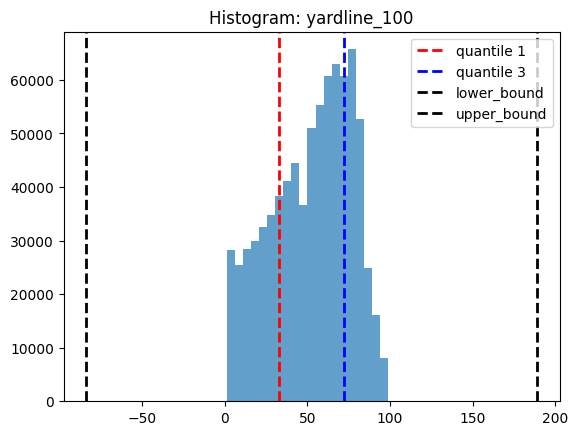

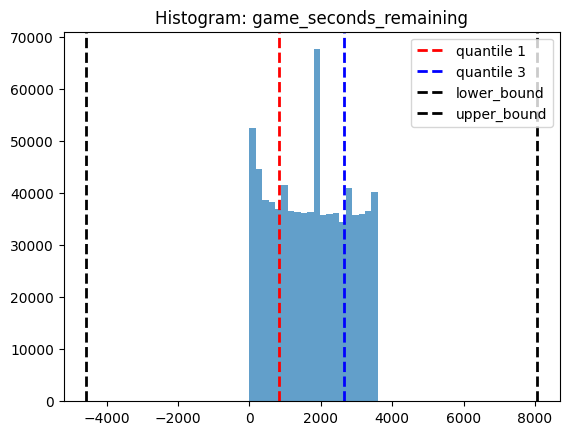

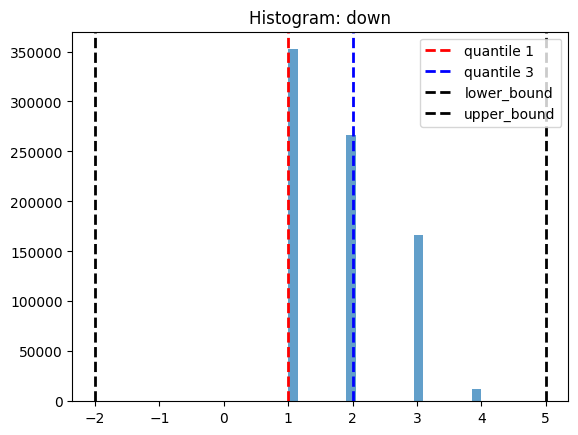

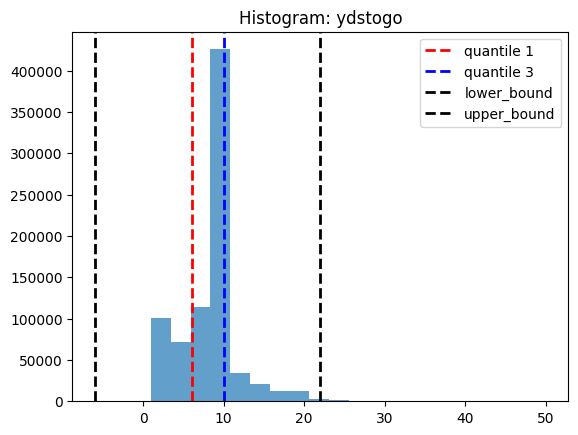

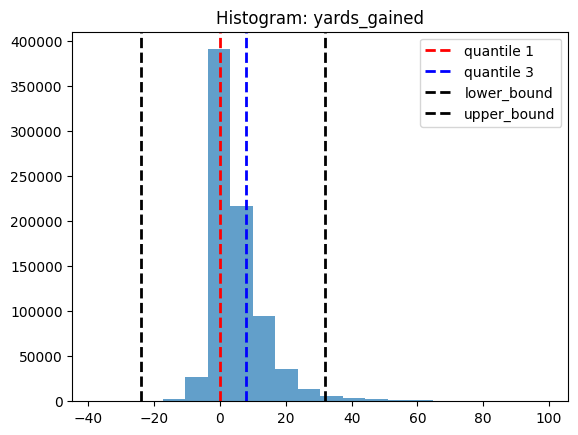

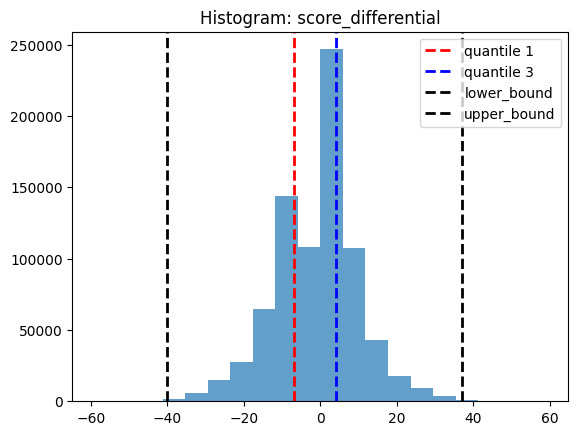

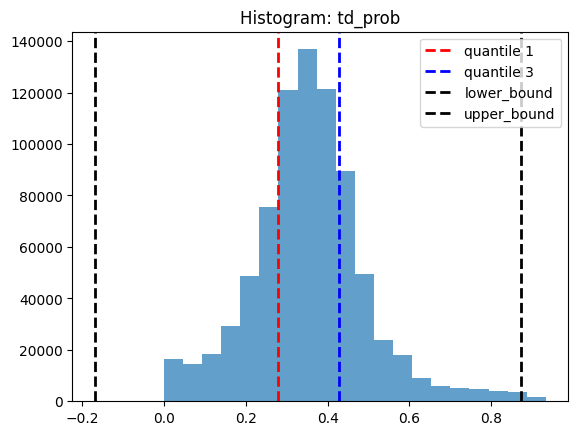

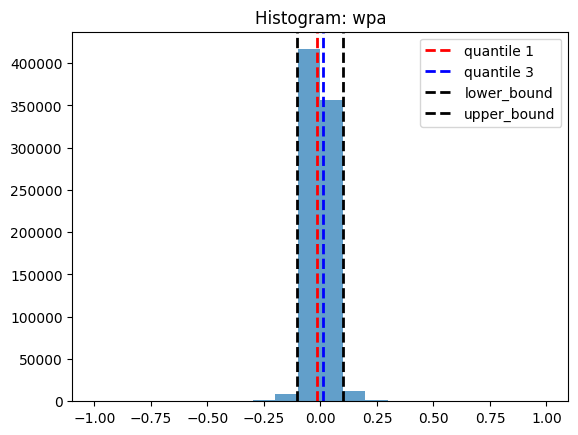

,min,max,mean,median,quantile1,quantile3,iqr,lower,upper
yardline_100,1.000000,99.000000,51.740163,55.000000,33.000000,72.000000,39.000000,-84.000000,189.000000
game_seconds_remaining,0.000000,3600.000000,1748.407190,1800.000000,841.000000,2645.000000,1804.000000,-4571.000000,8057.000000
down,1.000000,4.000000,1.798827,2.000000,1.000000,2.000000,1.000000,-2.000000,5.000000
ydstogo,1.000000,50.000000,8.591762,10.000000,6.000000,10.000000,4.000000,-6.000000,22.000000
yards_gained,-38.000000,99.000000,5.348802,3.000000,0.000000,8.000000,8.000000,-24.000000,32.000000
score_differential,-59.000000,59.000000,-1.427758,0.000000,-7.000000,4.000000,11.000000,-40.000000,37.000000
td_prob,0.000000,0.933002,0.354761,0.351412,0.278048,0.426879,0.148831,-0.168446,0.873373
wpa,-0.997815,0.996935,-0.000392,-0.001976,-0.016510,0.012498,0.029008,-0.103534,0.099522


C:\Users\thilo\AppData\Local\Temp\ipykernel_3348\1501374163.py:84: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



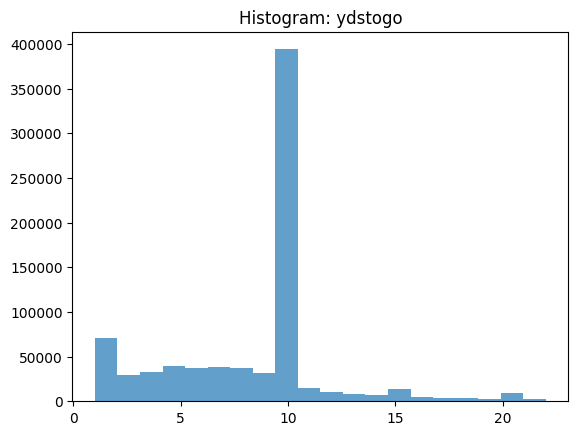

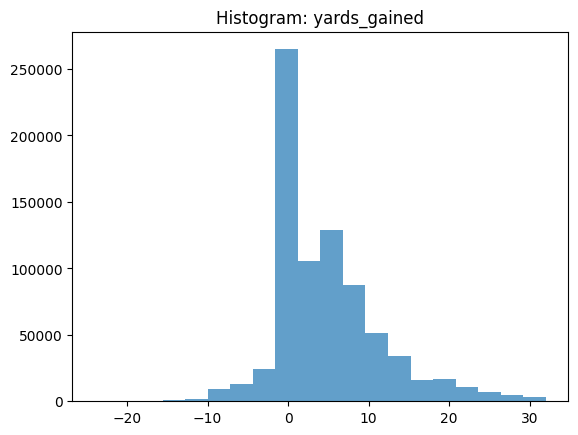

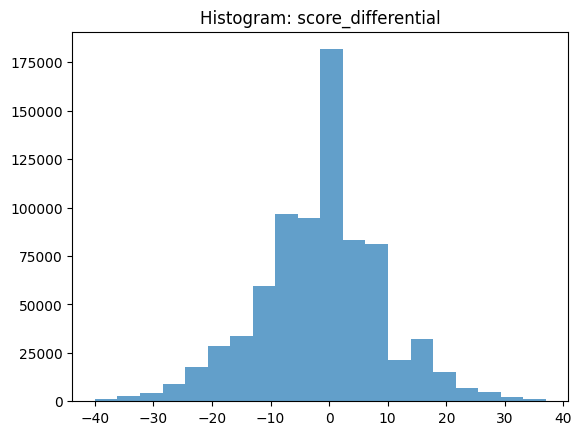

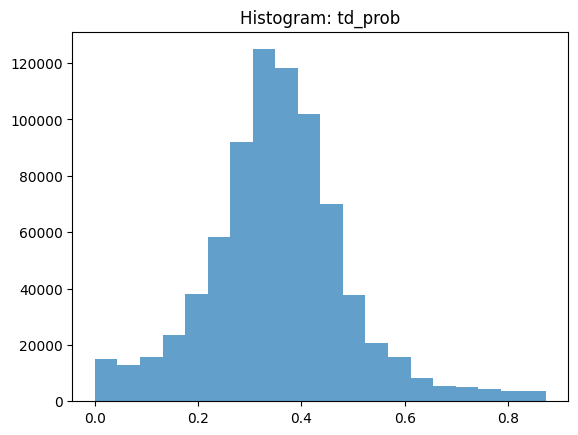

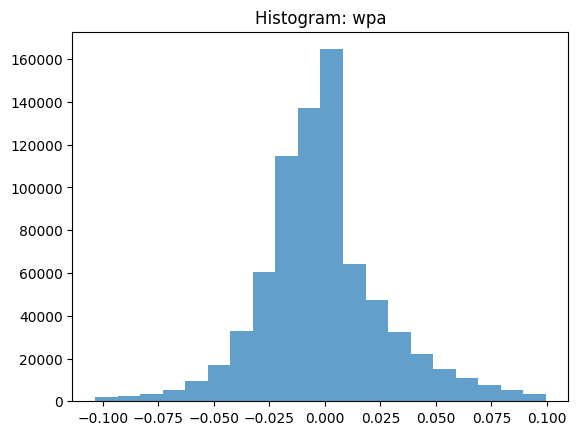

,min,max,mean,median
ydstogo,1.000000,22.000000,8.496904,10.000000
yards_gained,-24.000000,32.000000,4.654201,3.000000
score_differential,-40.000000,37.000000,-1.434232,0.000000
td_prob,0.000000,0.873362,0.354223,0.352037
wpa,-0.103533,0.099517,-0.001320,-0.002391


,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,posteam_DET,posteam_GB,posteam_HOU,posteam_IND,posteam_JAX,posteam_KC,posteam_LA,posteam_LAC,posteam_LV,posteam_MIA,posteam_MIN,posteam_NE,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS,posteam_type_home,roof_dome,roof_open,roof_outdoors,yardline_100,game_seconds_remaining,down,goal_to_go,ydstogo,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,score_differential,td_prob,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,div_game
234,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,75.0,758.0,2.0,False,23,pass,0.0,True,False,True,False,-10.0,0.264011,-0.009119,False,False,False,False,False,True
235,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,75.0,758.0,3.0,False,23,pass,0.0,False,False,True,False,-10.0,0.225679,-0.028493,False,False,False,False,False,True
757,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,50.0,431.0,3.0,False,26,pass,19.0,False,False,True,False,5.0,0.222287,0.010445,False,False,False,False,False,False
1376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,40.0,3483.0,2.0,False,25,pass,11.0,False,False,True,False,0.0,0.297896,0.000057,False,False,False,False,False,False
1608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,94.0,300.0,2.0,False,24,run,2.0,False,False,False,False,43.0,0.092884,-0.000060,False,False,False,False,False,True


,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,posteam_DET,posteam_GB,posteam_HOU,posteam_IND,posteam_JAX,posteam_KC,posteam_LA,posteam_LAC,posteam_LV,posteam_MIA,posteam_MIN,posteam_NE,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS,posteam_type_home,roof_dome,roof_open,roof_outdoors,yardline_100,game_seconds_remaining,down,goal_to_go,ydstogo,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,score_differential,td_prob,wpa,first_down_rush,first_down_pass,interception,qb_hit,fumble,div_game
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,77.0,3600.0,1.0,False,10,pass,0.0,False,False,True,False,0.0,0.342473,-0.018228,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,77.0,3600.0,2.0,False,10,run,1.0,False,False,False,False,0.0,0.310568,-0.030422,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,81.0,3600.0,3.0,False,14,pass,10.0,False,False,True,False,0.0,0.224716,-0.006659,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,81.0,3487.0,1.0,False,10,run,1.0,False,False,False,False,0.0,0.279041,-0.010499,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,80.0,3487.0,2.0,False,9,run,4.0,False,False,False,False,0.0,0.254127,-0.010026,False,False,False,False,False,True


In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

# set options to work with
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# show first 5 rows of dataframe
display(encoded_df.head())

# Convert the datatypes of the attributes in the DataFrame
for column in encoded_df.columns:
    try:
        encoded_df[column] = pd.to_numeric(encoded_df[column])
    except ValueError:
        encoded_df[column] = encoded_df[column].apply(str)


# Seperate boolean from numeric values, as they are irrelevant for the purpose filtering outliers
boolean_variables = ['posteam_ATL', 'posteam_BAL', 'posteam_BUF', 'posteam_CAR', 'posteam_CHI', 'posteam_CIN', 'posteam_CLE', 'posteam_DAL', 'posteam_DEN',
    'posteam_DET', 'posteam_GB', 'posteam_HOU', 'posteam_IND', 'posteam_JAX', 'posteam_KC', 'posteam_LA', 'posteam_LAC', 'posteam_LV', 'posteam_MIA', 'posteam_MIN',
    'posteam_NE', 'posteam_NO', 'posteam_NYG', 'posteam_NYJ', 'posteam_PHI', 'posteam_PIT', 'posteam_SEA', 'posteam_SF', 'posteam_TB', 'posteam_TEN', 'posteam_WAS',
    'posteam_type_home', 'roof_dome', 'roof_open', 'roof_outdoors', 'goal_to_go', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_scramble', 'first_down_rush', 
    'first_down_pass', 'interception', 'qb_hit', 'fumble', 'div_game']

for variable in boolean_variables:
    encoded_df[variable] = encoded_df[variable].astype(bool)

# 1. Create a Copy to work with
numeric_df = encoded_df.select_dtypes(include=['number']).copy()

# 2. Checking ranges and distributions
ranges_df = pd.DataFrame(columns=['min','max','mean', 'median', 'quantile1', 'quantile3', 'iqr', 'lower', 'upper'])

for column in numeric_df.columns:
    min_values = numeric_df[column].min()
    max_values = numeric_df[column].max()
    mean = numeric_df[column].mean()
    median = numeric_df[column].median()

    #set quantile
    quantile_value = 0.25
    q1 = numeric_df[column].quantile(quantile_value)
    q3 = numeric_df[column].quantile(1-quantile_value)
    iqr = q3-q1
    lower_bound = q1 - 3.0 * iqr
    upper_bound = q3 + 3.0 * iqr
    

    ranges_df.loc[column] = [min_values, max_values, mean, median, q1, q3, iqr, lower_bound, upper_bound]

    # Display the distributions of each column + the quantiles
    # Histogram
    plt.hist(numeric_df[column], bins=20, alpha=0.7)
    plt.axvline(q1, color='red', linestyle='dashed', linewidth=2, label='quantile 1')
    plt.axvline(q3, color='blue', linestyle='dashed', linewidth=2, label='quantile 3')
    plt.axvline(lower_bound, color='black', linestyle='dashed', linewidth=2, label='lower_bound')
    plt.axvline(upper_bound, color='black', linestyle='dashed', linewidth=2, label='upper_bound')
    plt.legend()
    plt.title('Histogram: ' + column)
    plt.show()

# Summary of ranges
display(ranges_df)

# Analyzing the Diagrams the following statements can be made
# a) Most of the values outliers can be explained and are therefor meaningfull for the dataset
#       --> Get rid of attributes that are negligible for outlier identification
drop_columns = ['yardline_100', 'game_seconds_remaining', 'down']
numeric_df.drop(drop_columns, axis=1, inplace=True)

# b) the data is already well defined and does not contain too many outliers
#       --> Keep only the rows where the values are within 3.0 times the IQR from Q1 and Q3
ranges_updated_df = pd.DataFrame(columns=['min','max','mean', 'median'])
discarded_rows = pd.DataFrame(columns=encoded_df.columns)

# 3. Remove the Rows that hold outliers 
for column in numeric_df.columns:
    lower_bound = ranges_df['lower'][column]
    upper_bound = ranges_df['upper'][column]

    outliers = encoded_df.loc[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)]
    discarded_rows = pd.concat([discarded_rows, outliers])
    encoded_df = encoded_df.loc[~((encoded_df[column] < lower_bound) | (encoded_df[column] > upper_bound))]
    numeric_df = numeric_df.loc[~((numeric_df[column]< lower_bound) | (numeric_df[column] > upper_bound))]

    # Histogram after removal of Extremal values
    plt.hist(numeric_df[column], bins=20, alpha=0.7)
    plt.title('Histogram: ' + column)
    plt.show()

    min_values = numeric_df[column].min()
    max_values = numeric_df[column].max()
    mean = numeric_df[column].mean()
    median = numeric_df[column].median()

    ranges_updated_df.loc[column] = [min_values, max_values, mean, median]

# 4. Display results
display(ranges_updated_df)
display(discarded_rows.head())
display(encoded_df.head())

# reset options
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

## Normalization

In [ ]:
# undo transformation to boolean values for binary features
for variable in boolean_variables:
    encoded_df[variable] = encoded_df[variable].astype(int)

In [ ]:
numeric_features = [
    "yardline_100",
    "game_seconds_remaining",
    "down",
    "ydstogo",
    "yards_gained",
    "score_differential",
    "td_prob",
    "wpa",
]

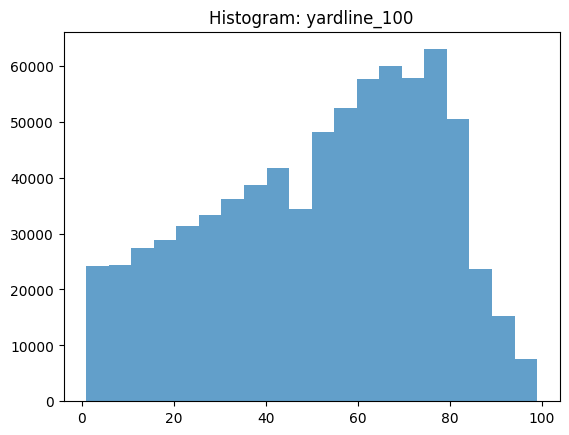

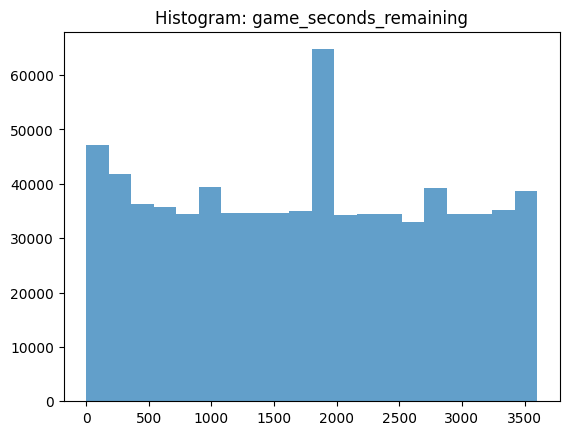

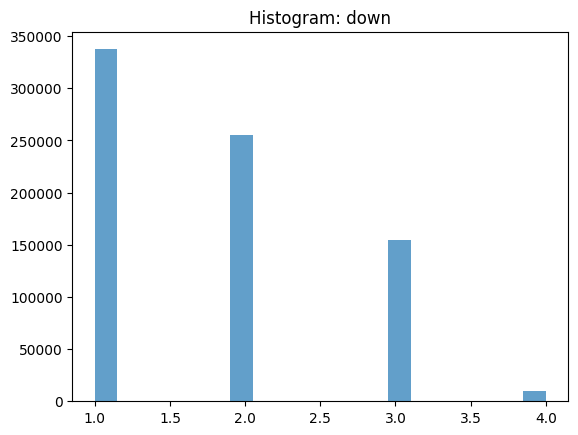

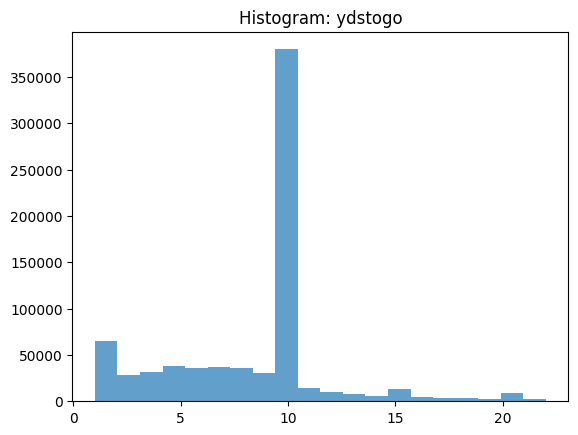

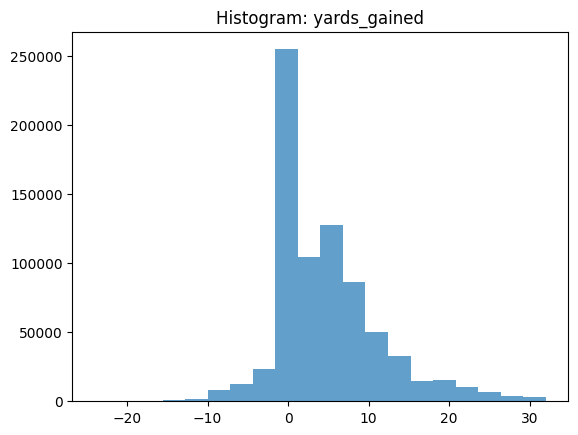

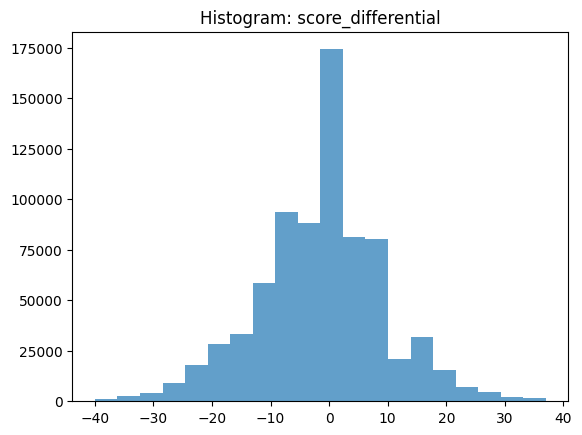

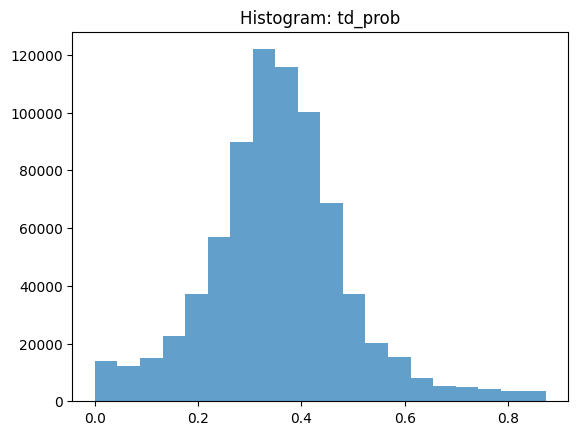

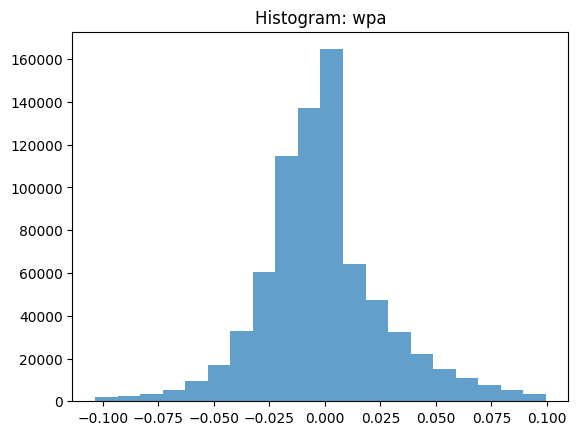

In [ ]:
# plot histograms to see the approximate distribution
for column in numeric_features:
   lower_bound = ranges_df['lower'][column]
   upper_bound = ranges_df['upper'][column]
   numeric_df = encoded_df.loc[~((encoded_df[column]< lower_bound) | (encoded_df[column] > upper_bound))]

   # Histogram after removal of Extremal values
   plt.hist(numeric_df[column], bins=20, alpha=0.7)
   plt.title('Histogram: ' + column)
   plt.show()

only the score_differential looks similar to a normal distribution. Therefore, it will be normalized using mean normalization while all other numerical features will be normalized using min-max-scaling

In [ ]:
numeric_features.remove('score_differential')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalization= ColumnTransformer(
    transformers=[
        ('standardization', StandardScaler(),['score_differential']),
        ('minmax', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough'  # include non-transformed columns
    )

normalized_data= normalization.fit_transform(encoded_df)
feature_names = [item.replace('standardization__', '').replace('minmax__', '').replace('remainder__', '') for item in normalization.get_feature_names_out()]
normalized_df = pd.DataFrame(normalized_data, columns=feature_names)

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(normalized_df.head())
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

,score_differential,yardline_100,game_seconds_remaining,down,ydstogo,yards_gained,td_prob,wpa,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,posteam_DET,posteam_GB,posteam_HOU,posteam_IND,posteam_JAX,posteam_KC,posteam_LA,posteam_LAC,posteam_LV,posteam_MIA,posteam_MIN,posteam_NE,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS,posteam_type_home,roof_dome,roof_open,roof_outdoors,goal_to_go,play_type,shotgun,no_huddle,qb_dropback,qb_scramble,first_down_rush,first_down_pass,interception,qb_hit,fumble,div_game
0,0.134104,0.77551,1.0,0.0,0.428571,0.428571,0.392132,0.420118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,pass,0,0,1,0,0,0,0,0,0,1
1,0.134104,0.77551,1.0,0.333333,0.428571,0.446429,0.3556,0.360064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,run,0,0,0,0,0,0,0,0,0,1
2,0.134104,0.816327,1.0,0.666667,0.619048,0.607143,0.2573,0.477096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,pass,0,0,1,0,0,0,0,0,0,1
3,0.134104,0.816327,0.968611,0.0,0.428571,0.446429,0.319502,0.45818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,run,0,0,0,0,0,0,0,0,0,1
4,0.134104,0.806122,0.968611,0.333333,0.380952,0.5,0.290975,0.460514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,run,0,0,0,0,0,0,0,0,0,1


## Splitting

In [ ]:
run_df= normalized_df[normalized_df['play_type']=="run"]
run_df.drop(["play_type"], axis=1, inplace=True)
pass_df= normalized_df[normalized_df['play_type']=="pass"]
pass_df.drop(["play_type"], axis=1, inplace=True)

C:\Users\thilo\AppData\Local\Temp\ipykernel_3348\297773163.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\thilo\AppData\Local\Temp\ipykernel_3348\297773163.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(run_df.head())
display(pass_df.head())
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

,score_differential,yardline_100,game_seconds_remaining,down,ydstogo,yards_gained,td_prob,wpa,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,posteam_DET,posteam_GB,posteam_HOU,posteam_IND,posteam_JAX,posteam_KC,posteam_LA,posteam_LAC,posteam_LV,posteam_MIA,posteam_MIN,posteam_NE,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS,posteam_type_home,roof_dome,roof_open,roof_outdoors,goal_to_go,shotgun,no_huddle,qb_dropback,qb_scramble,first_down_rush,first_down_pass,interception,qb_hit,fumble,div_game
1,0.134104,0.77551,1.0,0.333333,0.428571,0.446429,0.3556,0.360064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0.134104,0.816327,0.968611,0.0,0.428571,0.446429,0.319502,0.45818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0.134104,0.806122,0.968611,0.333333,0.380952,0.5,0.290975,0.460514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,0.134104,0.591837,0.941111,0.0,0.428571,0.553571,0.460634,0.575266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,0.134104,0.367347,0.941111,0.0,0.428571,0.446429,0.529473,0.438068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


,score_differential,yardline_100,game_seconds_remaining,down,ydstogo,yards_gained,td_prob,wpa,posteam_ATL,posteam_BAL,posteam_BUF,posteam_CAR,posteam_CHI,posteam_CIN,posteam_CLE,posteam_DAL,posteam_DEN,posteam_DET,posteam_GB,posteam_HOU,posteam_IND,posteam_JAX,posteam_KC,posteam_LA,posteam_LAC,posteam_LV,posteam_MIA,posteam_MIN,posteam_NE,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS,posteam_type_home,roof_dome,roof_open,roof_outdoors,goal_to_go,shotgun,no_huddle,qb_dropback,qb_scramble,first_down_rush,first_down_pass,interception,qb_hit,fumble,div_game
0,0.134104,0.77551,1.0,0.0,0.428571,0.428571,0.392132,0.420118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0.134104,0.816327,1.0,0.666667,0.619048,0.607143,0.2573,0.477096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
5,0.134104,0.765306,0.968611,0.666667,0.190476,0.428571,0.268782,0.321447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
7,0.134104,0.520408,0.941111,0.333333,0.095238,0.696429,0.48987,0.739032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
9,0.134104,0.357143,0.941111,0.333333,0.380952,0.535714,0.476747,0.465979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1


## Modelling